In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import math
import mplcursors
import per_cycle_analysis.single_sim_analysis as ipc

### Exp1
file_path_per_cycle = '/home/mremington/Documents/uumarrty_exps/owl_exp_pure/exp1/Data/per_cycle.csv'
file_path_parameter = '/home/mremington/Documents/uumarrty_exps/owl_exp_pure/exp1/Data/parameters.csv'
per_cycle = pd.read_csv(file_path_per_cycle,header = 0, index_col=None)
parameters = pd.read_csv(file_path_parameter,header = 0, index_col=None)
exp_1= per_cycle[per_cycle['sim_number']==0]
#exp_1_snake = exp_1[exp_1['org']=='snake']
#snake_reproduction_freq = parameters['snake_reproduction_freq_per_x_cycles'].max()
#snake_by_gen_exp1 = exp_1_snake[exp_1_snake.apply(lambda exp_1_snake: (exp_1_snake['cycle'] % snake_reproduction_freq)==0, axis=1)]
exp_1_krat = exp_1[exp_1['org']=='krat']
krat_reproduction_freq = parameters['krat_reproduction_freq_per_x_cycles'].max()
krat_by_gen_exp1 = exp_1_krat[exp_1_krat.apply(lambda exp_1_krat: (exp_1_krat['cycle'] % krat_reproduction_freq)==0, axis=1)]

### Exp6
file_path_per_cycle_exp6 = '/home/mremington/Documents/uumarrty_exps/owl_exp_mixed/exp6/Data/per_cycle.csv'
file_path_parameter_exp6 = '/home/mremington/Documents/uumarrty_exps/owl_exp_mixed/exp6/Data/parameters.csv'
per_cycle_exp6 = pd.read_csv(file_path_per_cycle_exp6,header = 0, index_col=None)
parameters_exp6 = pd.read_csv(file_path_parameter_exp6,header = 0, index_col=None)
sim_exp6 = per_cycle_exp6[per_cycle_exp6['sim_number']==0]
# sim_snake_exp6 = sim_exp6[sim_exp6['org']=='snake']
# snake_reproduction_freq_exp6 = parameters_exp6['snake_reproduction_freq_per_x_cycles'].max()
# snake_by_gen_exp6 = sim_snake_exp6[sim_snake_exp6.apply(lambda sim_snake_exp6: (sim_snake_exp6['cycle'] % snake_reproduction_freq_exp6)==0, axis=1)]
sim_krat_exp6 = sim_exp6[sim_exp6['org']=='krat']
krat_reproduction_freq_exp6 = parameters_exp6['krat_reproduction_freq_per_x_cycles'].max()
krat_by_gen_exp6 = sim_krat_exp6[sim_krat_exp6.apply(lambda sim_krat_exp6: (sim_krat_exp6['cycle'] % krat_reproduction_freq_exp6)==0, axis=1)]


In [3]:
### exp 1
step_size=1
sensitivity=0.01
krat_gen_temp = krat_by_gen_exp1[krat_by_gen_exp1['generation']>=4000]
krat_gen_temp = krat_gen_temp[krat_gen_temp['generation']<=4500]
#krat_gen_temp.head()
x = list(krat_gen_temp['generation'])
y = list(krat_gen_temp["bush_pw_mean"])
yx_dx = ipc.aprox_derv_central(data=y,step_size_forward=1,step_size_backward=step_size)
smooth_yx_dx = ipc.savitzky_golay(y_list=yx_dx, window_size=3, order=1, deriv=0, rate=1)
yx_dx2 = ipc.aprox_derv_central(data=yx_dx,step_size_forward=step_size,step_size_backward=step_size)
smooth_yx_dx2 = ipc.savitzky_golay(y_list=yx_dx2, window_size=3, order=1, deriv=0, rate=1)
data_tuples = list(zip(x,y,smooth_yx_dx,smooth_yx_dx2))
df = pd.DataFrame(data_tuples, columns=['x','y','yx_dx','yx_dx2'])
classifacation = ipc.inflection_point_classifaction(df=df,sensitivity=sensitivity)
df['point_classifacation'] = classifacation
dot_class = ipc.plotable_points(df=df)
df['dot_class'] = dot_class
df['min_max_flip'] = ipc.min_max_flip_by_gen(df=df)
#df['time_as_max_min'] = df.groupby((df['min_max_flip'] != df['min_max_flip'].shift(1)).cumsum()).cumcount()+1
df['time_as_max_min'] = ipc.time_as_min_max(df=df)
df['min_max_filter'] = ipc.min_max_filter(df=df)

In [3]:
# exp 6
step_size=1
sensitivity=0.01
krat_gen_temp_E6 = krat_by_gen_exp6#[krat_by_gen_exp6['generation']>=4000]
#krat_gen_temp_E6 = krat_gen_temp_E6[krat_gen_temp_E6['generation']<=4500]
x = list(krat_gen_temp_E6['generation'])
y = list(krat_gen_temp_E6["bush_pw_mean"])
yx_dx = ipc.aprox_derv_central(data=y,step_size_forward=1,step_size_backward=step_size)
smooth_yx_dx = ipc.savitzky_golay(y_list=yx_dx, window_size=3, order=1, deriv=0, rate=1)
yx_dx2 = ipc.aprox_derv_central(data=yx_dx,step_size_forward=step_size,step_size_backward=step_size)
smooth_yx_dx2 = ipc.savitzky_golay(y_list=yx_dx2, window_size=3, order=1, deriv=0, rate=1)
data_tuples = list(zip(x,y,smooth_yx_dx,smooth_yx_dx2))
df_e6 = pd.DataFrame(data_tuples, columns=['x','y','yx_dx','yx_dx2'])
classifacation = ipc.inflection_point_classifaction(df=df_e6,sensitivity=sensitivity)
df_e6['point_classifacation'] = classifacation
dot_class = ipc.plotable_points(df=df_e6)
df_e6['dot_class'] = dot_class
df_e6['min_max_flip'] = ipc.min_max_flip_by_gen(df=df_e6)
#df['time_as_max_min'] = df.groupby((df['min_max_flip'] != df['min_max_flip'].shift(1)).cumsum()).cumcount()+1
df_e6['time_as_max_min'] = ipc.time_as_min_max(df=df_e6)
df_e6['min_max_filter'] = ipc.min_max_filter(df=df_e6)


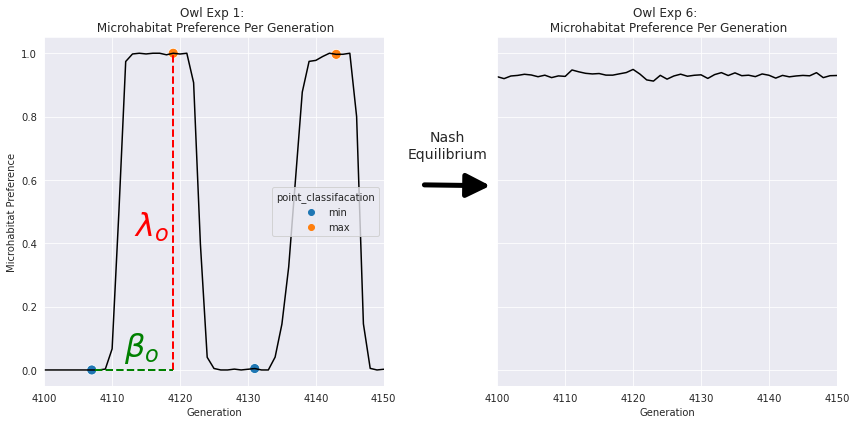

In [4]:
#%matplotlib notebook
### krats ####


arrow_args = dict(arrowstyle="->")



with sns.axes_style("darkgrid"):
    fig, axes = plt.subplots(1, 2, sharex=False,sharey=True, figsize=(12,6))
    sns.lineplot(ax=axes[0],data=df, x="x", y="y", color = 'black')
    sns.scatterplot(ax=axes[0],data=df, x="x", y="dot_class", hue="point_classifacation",s=100)
    axes[0].set(title='Owl Exp 1: \n Microhabitat Preference Per Generation',
           ylabel = "Microhabitat Preference",
           xlabel = "Generation",
           xlim=(4100, 4150),)
    axes[0].axvline(x=4119, ymin =0.045, ymax=0.951,linewidth=2, color='r',linestyle='--')
    axes[0].axhline(y=0,xmin =0.15, xmax=0.38, color="g", linestyle="--",linewidth=2)
    axes[0].annotate(r'$\lambda_{o}$',fontsize=32,color='r',
            xy=(90, 150), xycoords='axes points'
            )
    axes[0].annotate(r'$\beta_{o}$',fontsize=32,color='g',
            xy=(80, 30), xycoords='axes points'
            )
    sns.lineplot(ax=axes[1],data=df_e6, x="x", y="y",color='black')
    sns.scatterplot(ax=axes[1],data=df_e6, x="x", y="dot_class", hue="point_classifacation",s=100)
    axes[1].set(title='Owl Exp 6: \n Microhabitat Preference Per Generation',
           ylabel = "Microhabitat Preference",
           xlabel = "Generation",
           xlim=(4100, 4150),)
    axes[1].annotate('Nash\nEquilibrium',
                 xy=(-50, 240),
                 fontsize=14,
                 xycoords='axes points',
                va="center", ha="center",
               )
    axes[1].annotate(' ', 
                 xy=(-5, 200), 
                 xycoords='axes points',
                 xytext=(-80, 198),
                 textcoords='axes points',
                 arrowprops=dict(arrowstyle= '-|>',
                                 color='black',
                                 lw=5,
                                 ls='-',
                                 mutation_scale=50,)
               )
    

#mplcursors.cursor(hover=True)
fig.tight_layout()
#plt.savefig('/home/mremington/Documents/uumarrty_post_sim/uumarrty_post_sim_analysis/images/nash.png') 

In [26]:
# %matplotlib notebook
# ### Snakes ####


# f = plt.figure(figsize=(12, 6))
# gs = f.add_gridspec(1, 2)

# with sns.axes_style("whitegrid"):
#     ax = f.add_subplot(gs[0, 0])
#     sns.lineplot(data=df_e6, x="x", y="y",color='r')
#     sns.scatterplot(data=df_e6, x="x", y="dot_class", hue="point_classifacation",s=100)
#     ax.set(ylim=(0, 1.1))

# # with sns.axes_style("whitegrid"):
# #     ax = f.add_subplot(gs[0, 1])
# #     #sns.lineplot(data=df_snake, x="x", y="yx_dx",color='g')
# #     sns.lineplot(data=df_snake, x="x", y="yx_dx2",color='b')
# #     #ax.set(xlim=(1500, 1510))
# # #     sns.lineplot(data=df_snake, x="x", y="yx_dx2",color='b')
# # #     plt.legend(labels=["d1","d2"])
# mplcursors.cursor(hover=True)
# f.tight_layout()

In [3]:
import random as rng
rng.seed(555)

t = np.arange(0,32,0.1) 
def cos_function(time_step,amplitude):
    return (amplitude)*np.cos(time_step)+0.5



# ts_1 = [cos_function(time_step=time_step) for time_step in t]
# t=t[:len(ts_1)]

<IPython.core.display.Javascript object>


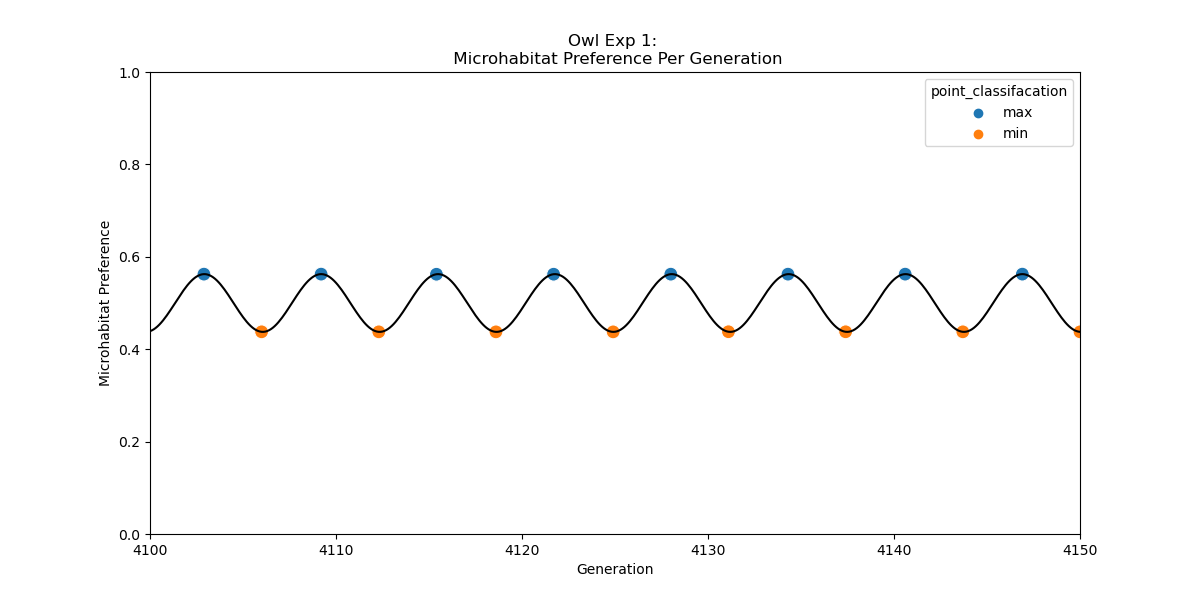

[Text(0.5, 1.0, 'Owl Exp 1: \n Microhabitat Preference Per Generation'),
 Text(0, 0.5, 'Microhabitat Preference'),
 Text(0.5, 0, 'Generation'),
 (0.0, 1.0),
 (4100.0, 4150.0)]

In [6]:
### deterministic
%matplotlib notebook
# i = [(1/2),(1/4),(1/8),(1/16),(1/32),0.0]

# for amplitude in i:
amplitude =(1/16)
step_size=1
sensitivity=0.0001
krat_gen_temp = krat_by_gen_exp1[krat_by_gen_exp1['generation']>=4000]
krat_gen_temp = krat_gen_temp[krat_gen_temp['generation']<=4500]
#krat_gen_temp.head()
x = np.arange(4000,4500,0.1) 
y = [cos_function(time_step=time_step,amplitude=amplitude) for time_step in x]
yx_dx = ipc.aprox_derv_central(data=y,step_size_forward=1,step_size_backward=step_size)
smooth_yx_dx = ipc.savitzky_golay(y_list=yx_dx, window_size=3, order=1, deriv=0, rate=1)
yx_dx2 = ipc.aprox_derv_central(data=yx_dx,step_size_forward=step_size,step_size_backward=step_size)
smooth_yx_dx2 = ipc.savitzky_golay(y_list=yx_dx2, window_size=3, order=1, deriv=0, rate=1)
data_tuples = list(zip(x,y,smooth_yx_dx,smooth_yx_dx2))
df = pd.DataFrame(data_tuples, columns=['x','y','yx_dx','yx_dx2'])
classifacation = ipc.inflection_point_classifaction(df=df,sensitivity=sensitivity)
df['point_classifacation'] = classifacation
dot_class = ipc.plotable_points(df=df)
df['dot_class'] = dot_class
df['min_max_flip'] = ipc.min_max_flip_by_gen(df=df)
#df['time_as_max_min'] = df.groupby((df['min_max_flip'] != df['min_max_flip'].shift(1)).cumsum()).cumcount()+1
df['time_as_max_min'] = ipc.time_as_min_max(df=df)
df['min_max_filter'] = ipc.min_max_filter(df=df)
fig, axes = plt.subplots(1, 1, sharex=False,sharey=True, figsize=(12,6))
sns.lineplot(ax=axes,data=df, x="x", y="y", color = 'black')
sns.scatterplot(ax=axes,data=df, x="x", y="dot_class", hue="point_classifacation",s=100)
axes.set(title='Owl Exp 1: \n Microhabitat Preference Per Generation',
       ylabel = "Microhabitat Preference",
       xlabel = "Generation",
       ylim = (0,1),
       xlim=(4100, 4150),)


In [48]:
df.head(50)

,x,y,yx_dx,yx_dx2,point_classifacation,dot_class,min_max_flip,time_as_max_min,min_max_filter
0,4000.0,0.135027,NaN,NaN,NaN,NaN,NaN,NaN,0
1,4000.1,0.170968,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4000.2,0.210197,0.040542,NaN,NaN,NaN,NaN,NaN,0
3,4000.3,0.252322,0.043218,0.002460,NaN,NaN,NaN,NaN,0
4,4000.4,0.296922,0.045462,0.002017,NaN,NaN,NaN,NaN,0
5,4000.5,0.343550,0.047252,0.001554,NaN,NaN,NaN,NaN,0
6,4000.6,0.391742,0.048570,0.001075,NaN,NaN,NaN,NaN,0
7,4000.7,0.441016,0.049403,0.000586,NaN,NaN,NaN,NaN,0
8,4000.8,0.490878,0.049742,0.000091,NaN,NaN,NaN,NaN,0
9,4000.9,0.540832,0.049584,-0.000406,NaN,NaN,NaN,NaN,0
